 Part B: Hierarchical Clustering Tasks
 1. Use the same dataset or a different one.
 2. Standardize the dataset using StandardScaler.
 3. Apply Agglomerative Hierarchical Clustering:
   - Use different linkage methods: ward, complete, average, single.
   - Visualize the dendrogram using scipy.cluster.hierarchy.dendrogram.
   - Cut the dendrogram at a suitable height to decide cluster count.
 4. Compare results of hierarchical clustering with K-Means clustering

In [2]:
# Clustering Assignment Part B: Hierarchical Clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# 1️. Use the same dataset: Iris
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [3]:
# 2️. Standardize the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


--- Using Linkage Method: WARD ---


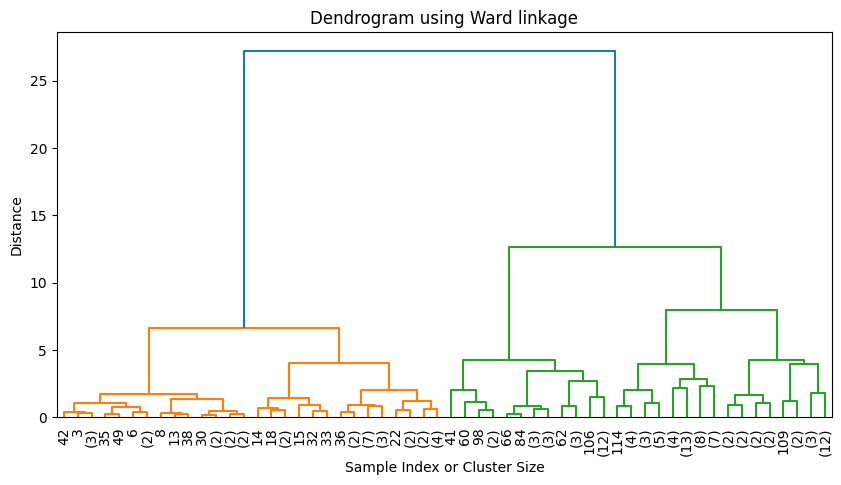

Silhouette Score (ward): 0.4466890410285909
Cluster Distribution:
 1    49
2    30
3    71
Name: count, dtype: int64

--- Using Linkage Method: COMPLETE ---


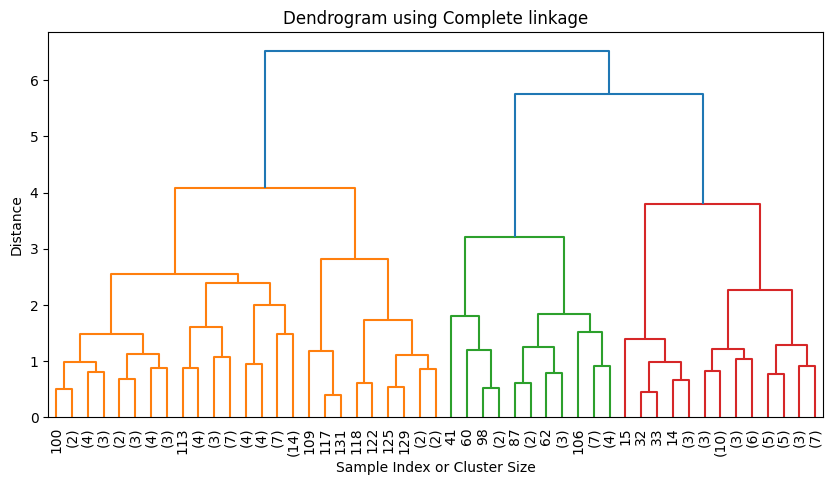

Silhouette Score (complete): 0.44961848359884726
Cluster Distribution:
 1    77
2    24
3    49
Name: count, dtype: int64

--- Using Linkage Method: AVERAGE ---


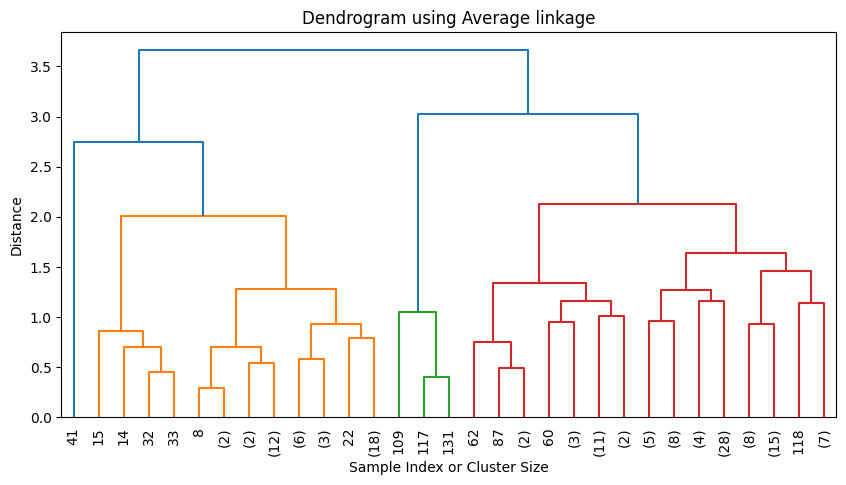

Silhouette Score (average): 0.4802669329728697
Cluster Distribution:
 1    50
2     3
3    97
Name: count, dtype: int64

--- Using Linkage Method: SINGLE ---


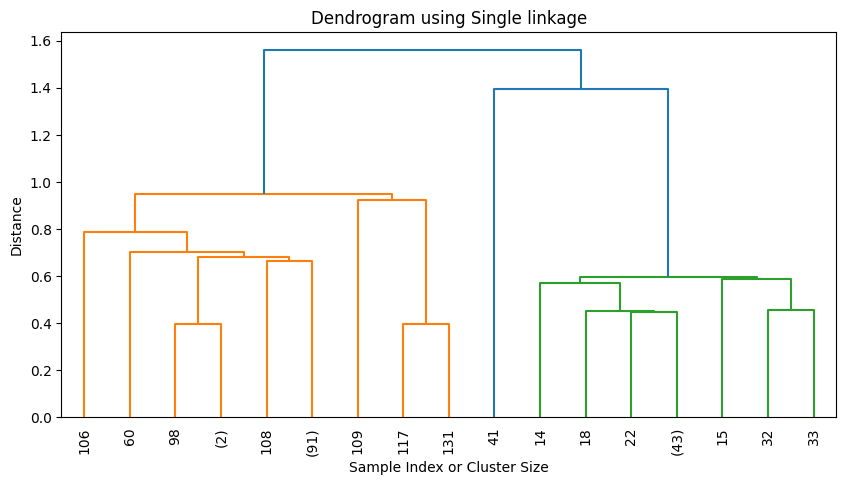

Silhouette Score (single): 0.504645610832545
Cluster Distribution:
 1    100
2     49
3      1
Name: count, dtype: int64


In [4]:
# 3️. Apply Agglomerative Hierarchical Clustering

linkage_methods = ['ward', 'complete', 'average', 'single']

for method in linkage_methods:
    print(f"\n--- Using Linkage Method: {method.upper()} ---")
    linked = linkage(scaled_data, method=method)
    
    plt.figure(figsize=(10, 5))
    dendrogram(linked,
               truncate_mode='level',  
               p=5,
               leaf_rotation=90,
               leaf_font_size=10,
               color_threshold=None)
    plt.title(f"Dendrogram using {method.capitalize()} linkage")
    plt.xlabel("Sample Index or Cluster Size")
    plt.ylabel("Distance")
    plt.show()
    
    cluster_labels = fcluster(linked, t=3, criterion='maxclust')
    
    df[f'Cluster_{method}'] = cluster_labels
    
    sil_score = silhouette_score(scaled_data, cluster_labels)
    print(f"Silhouette Score ({method}):", sil_score)
    cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
    print("Cluster Distribution:\n", cluster_counts)


--- K-Means Comparison ---
Silhouette Score (K-Means): 0.45994823920518635
Cluster Distribution (K-Means):
 0    53
1    50
2    47
Name: count, dtype: int64


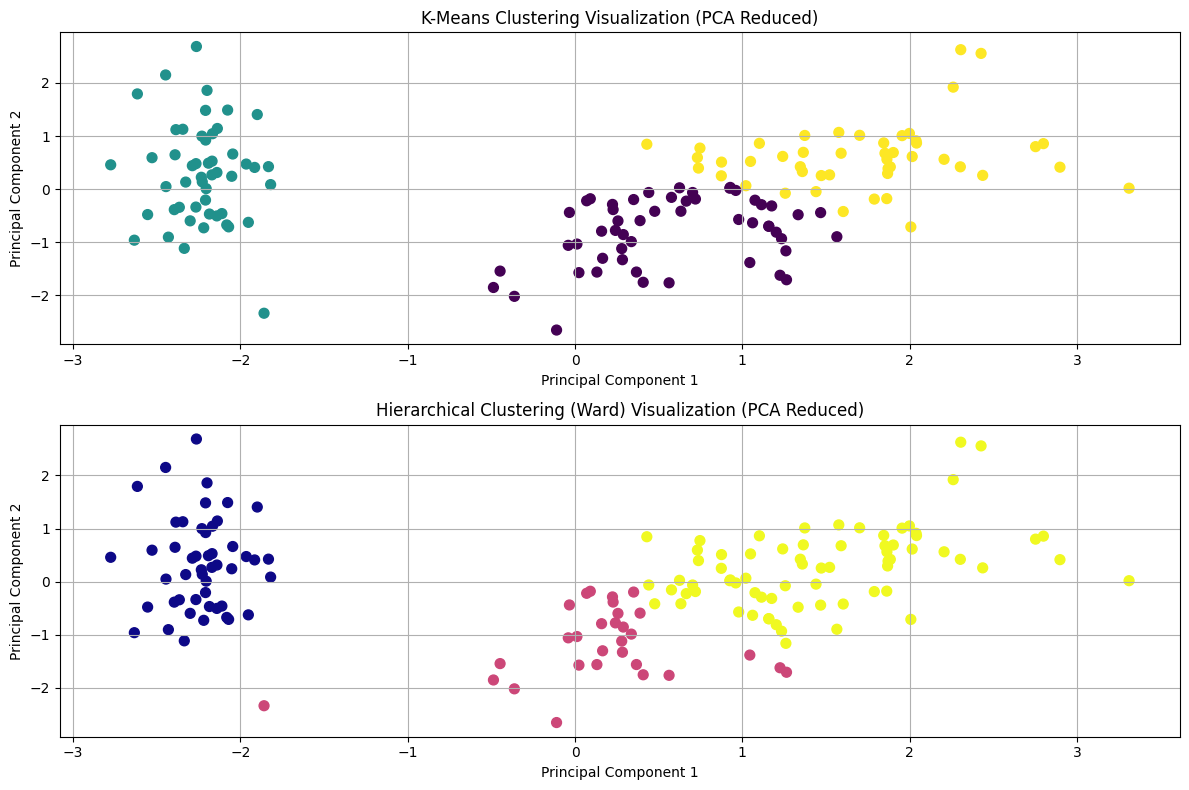

In [5]:
# 4️. Compare with K-Means Clustering Results

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(scaled_data)
df['KMeans_Cluster'] = kmeans_labels

kmeans_sil_score = silhouette_score(scaled_data, kmeans_labels)
print("\n--- K-Means Comparison ---")
print("Silhouette Score (K-Means):", kmeans_sil_score)

kmeans_counts = pd.Series(kmeans_labels).value_counts().sort_index()
print("Cluster Distribution (K-Means):\n", kmeans_counts)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('K-Means Clustering Visualization (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df['Cluster_ward'], cmap='plasma', s=50)
plt.title('Hierarchical Clustering (Ward) Visualization (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)

plt.tight_layout()
plt.show()